In [21]:
import csv
import matplotlib.pyplot as plt
import numpy as np

Производится чтение файла CSV, посвященного статистике продаж видеоигр за последние 20 лет. Конкретно, отражены продажи различных наименований в Северной Америке, Европе, Японии (наиболее прибыльные сегменты рынка) и суммарно в остальном мире. Путем построчного чтения загруженного файла, массивы заполняются соответствующими данными.

Стоит сразу отметить, что подобранная выборка представляет из себя четыре независимых неупорядоченных массива числовых данных. Этот факт будет учитываться при построении графиков.

In [23]:
with open("Game Sales.csv", encoding='utf-8') as r_file:
    reader = csv.reader(r_file, delimiter = ",")
    zero_flag = 0
    NA_sales = np.array([])
    EU_sales = np.array([])
    JP_sales = np.array([])
    Other_sales = np.array([])
    for row in reader:
      if (zero_flag == 0):
        zero_flag = 1
      else:
        NA_sales = np.append(NA_sales, float(row[4]))
        EU_sales= np.append(EU_sales, float(row[5]))
        JP_sales = np.append(JP_sales, float(row[6]))
        Other_sales = np.append(Other_sales, float(row[7]))

Далее, удаляются нулевые значения, которые в данном контексте, либо представляют незначимые для статистики элементы, либо попросту обозначают отсутствие данных (null) по данной категории продаж для данного наименования.

После, создается общий двумерный массив для всех категорий продаж, а также словарь, в который помещаются метки, средние значения продаж и цвета, которыми они будут представлены.

In [24]:
NA_sales = NA_sales[NA_sales != 0.0]
EU_sales = EU_sales[EU_sales != 0.0]
JP_sales = JP_sales[JP_sales != 0.0]
Other_sales = Other_sales[Other_sales != 0.0]

data = [NA_sales, EU_sales, JP_sales, Other_sales]
data_mean = {
    'sales': ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales'],
    'mean': [np.mean(NA_sales), np.mean(EU_sales), np.mean(JP_sales), np.mean(Other_sales)],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}

Первым графиком станет самая обычная диаграмма рассеивания с линией тренда для различных категорий продаж.

Можно сразу понять, что данная диаграмма плохо подходит для представления столь больших массивов данных. Во-первых, огромное количество точек делает график плохо читаемым. Во-вторых, хоть линия тренда и дает судить о постоянности тенденции в сфере видеоигровых продаж в каждом сегменте рынка, но она все равно малоинформативна, так как данные абсолютно не упорядочены и не отсортированы не по какому критерию.

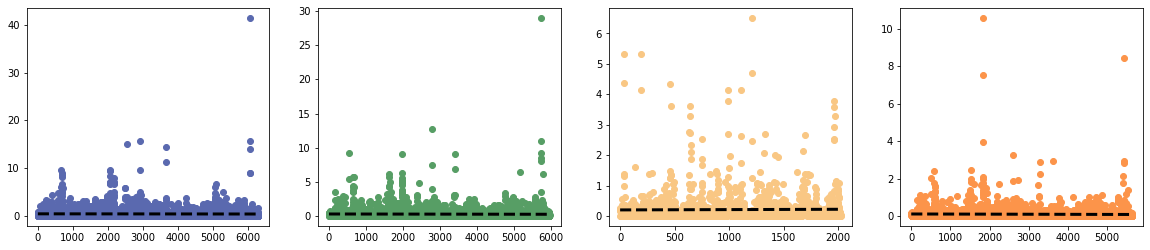

In [25]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
ax[0].scatter(np.arange(data[0].size), data[0], color = data_mean['color'][0])
z = np.polyfit (np.arange(data[0].size), data[0], 1)
p = np.poly1d(z)
ax[0].plot(np.arange(data[0].size), p(np.arange(data[0].size)), color = "black", linewidth = 3 , linestyle= "--")
ax[1].scatter(np.arange(data[1].size), data[1], color = data_mean['color'][1])
z = np.polyfit (np.arange(data[1].size), data[1], 1)
p = np.poly1d(z)
ax[1].plot(np.arange(data[1].size), p(np.arange(data[1].size)), color = "black", linewidth = 3 , linestyle= "--")
ax[2].scatter(np.arange(data[2].size), data[2], color = data_mean['color'][2])
z = np.polyfit(np.arange(data[2].size), data[2], 1)
p = np.poly1d(z)
ax[2].plot(np.arange(data[2].size), p(np.arange(data[2].size)), color = "black", linewidth = 3 , linestyle= "--")
ax[3].scatter(np.arange(data[3].size), data[3], color = data_mean['color'][3])
z = np.polyfit(np.arange(data[3].size), data[3], 1)
p = np.poly1d(z)
ax[3].plot(np.arange(data[3].size), p(np.arange(data[3].size)), color = "black", linewidth = 3 , linestyle= "--")

Стоит воспользоваться диаграммами, которые рекомендованы методологиями визуализации данных, например, пузырьковой диаграммой. Для построения подобной диаграммы были отобраны средние значения продаж по всем категориям.

Как видно, пузырьковая диаграмма позволяет здраво оценить, как рынки различных стран соотносятся друг с другом и какой вклад вносят в общемировые продажи. Так, как было упомянуто, Северная Америка и Европа дают наибольший доход видеоигровой индустрии, в то время как доля продаж в большинстве стран мира суммарно почти в 2 раза меньше, чем даже в Японии.

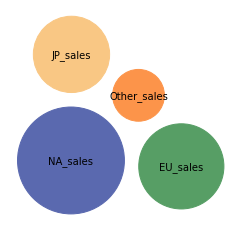

In [26]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)
        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]
        self.com = self.center_of_mass()
    def center_of_mass(self):
        return np.average(self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3])
    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0], bubble[1] - bubbles[:, 1])
    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing
    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])
    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]
    def collapse(self, n_iterations=50):
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                dir_vec = self.com - self.bubbles[i, :2]
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        new_point1 = (self.bubbles[i, :2] + orth * self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth * self.step_dist)
                        dist1 = self.center_distance(self.com, np.array([new_point1]))
                        dist2 = self.center_distance(self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()
            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2
    def plot(self, ax, labels, colors):
        for i in range(len(self.bubbles)):
            circ = plt.Circle(self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i], horizontalalignment='center', verticalalignment='center')
bubble_chart = BubbleChart(area=data_mean['mean'], bubble_spacing=0.1)
bubble_chart.collapse()
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, data_mean['sales'], data_mean['color'])
ax.axis("off")
ax.autoscale_view()
plt.show()

По тем же данным, построена и небольшая гистограмма, которая также, в достаточно понятном виде, позволяет сделать те же выводы. И все же, в данном случае по оси Y отложена числовая ось (млн. долл.), по которой можно более конкретно судить о средних показателях продаж. Средние продажи в Северной Америке превышают 0,4 млн. долл., в Европе и Японии находятся близко к 0,25 млн. долл., а в остальном мире суммарно чуть превышают значение в 0,1 млн. долл.

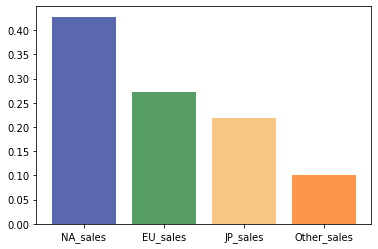

In [28]:
fig, ax = plt.subplots()
ax.bar(data_mean['sales'], data_mean['mean'], color=data_mean['color'])
plt.show()

Вновь ориентируясь на методологию визуализации данных, перейдем к еще более информативному, с точки зрения статистики, графику - ящик с усами.

На нем представлены диапазоны, в которые входят 50% от всех данных и вычисленные медианные значения. Можно сказать, что 50%-диапазон для продаж в Северной Америке, Европе и Японии достаточно широкий, то есть прослеживается умеренный разброс. При этом, медианное значение у всех категорий достаточно низкое, следовательно, около половины значений продаж все-таки не превышает 0,1-0,2 млн. долл. 

Чем же тогда объясняются достаточно высокие средние значения? Ответ прост - выбросами. На графике этого, к сожалению, не видно, но выборка содержит некоторое количество аномально высоких значений (подобные значения объясняются сравнительно крупными объемами продаж крайне популярных игровых франшиз). Если бы график был представлен в полном масштабе, "ящики" были бы практически не видны, график стал бы нечитаемым (особенно это касается крайне неоднородных значений продаж в остальном мире). Так что, для удобства график пришлось ограничить по оси Y, хоть это и считается дурным тоном.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


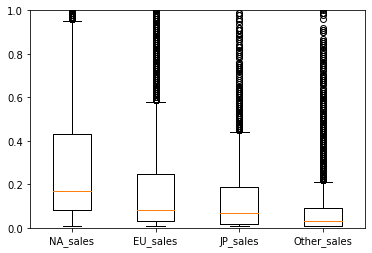

In [36]:
fig, ax = plt.subplots()
ax.boxplot(data, labels = data_mean['sales'])
plt.ylim([0, 1])
plt.show()

Для решения проблемы потери значений можно построить еще один рекомендованный вид графика - скрипичная диаграмма.

На ней тоже пришлось ограничить представление оси Y, однако характер распределения данных полностью отражается в заданных пределах.

Можно сказать, что характер убывания верхних значений достаточно плавный, в то время как низкие значения стремятся к нулю и заканчиваются достаточно резко, что означает их большую концентрацию в диапазоне от 0,05 до 0,2 млн. долл. (особенно для значений продаж в остальном мире) Подобную картину можно было наблюдать и на предыдущей диаграмме.

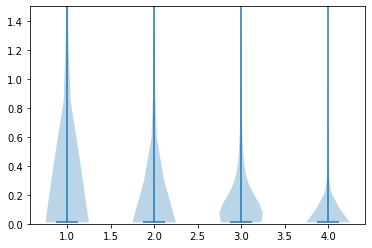

In [41]:
fig, ax = plt.subplots()
ax.violinplot(data)
plt.ylim([0, 1.5])
plt.show()

Таким образом, можно сделать вывод о том, что пузырьковая и скрипичная диаграммы вместе в достаточной мере являются наглядными и репрезентативными для представленной выборки видеоигровых продаж в различных уголках света. Они позволяют судить о распределении данных на числовых осях, определять средние значения и их соотношение между собой.